<a href="https://colab.research.google.com/github/GOPI-JAKKA2005/-Emergency-contact-app/blob/main/Heart_Disease_Prediction_System_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving heart.csv to heart (1).csv
✅ Dataset loaded successfully.
Shape: (1025, 14)

🔹 Training Logistic Regression...
Accuracy: 0.8097560975609757
ROC AUC: 0.9298095238095239
Confusion Matrix:
 [[70 30]
 [ 9 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205


🔹 Training Random Forest...

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 1.0
ROC AUC: 1.0
Confusion Matrix:
 [[100   0]
 [  0 105]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg 

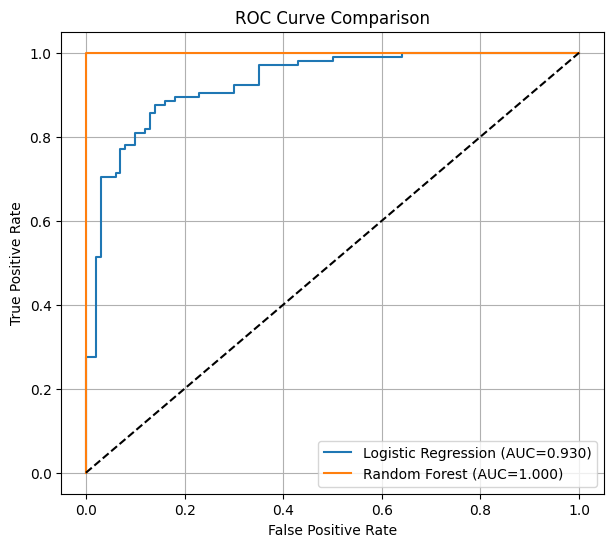


💾 Models saved successfully.

🩺 Predicted Heart Disease Probability: 0.020


In [1]:

!pip install scikit-learn pandas numpy matplotlib joblib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

RANDOM_STATE = 42

# 2️⃣ Upload your dataset
from google.colab import files
uploaded = files.upload()   # Upload your heart.csv file here

# 3️⃣ Load dataset
df = pd.read_csv("/content/heart.csv")   # If the uploaded file has a different name, change it here
print("✅ Dataset loaded successfully.")
print("Shape:", df.shape)
df.head()

# 4️⃣ Data preprocessing
if "target" not in df.columns:
    raise ValueError("Expected a column named 'target' in the dataset")

X = df.drop(columns=["target"])
y = df["target"]

# Fill missing values if any
X = X.fillna(X.median())

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5️⃣ Logistic Regression
print("\n🔹 Training Logistic Regression...")
lr = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# 6️⃣ Random Forest
print("\n🔹 Training Random Forest...")
rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 6, 10],
    "min_samples_split": [2, 5]
}
grid = GridSearchCV(rf, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid.fit(X_train_scaled, y_train)
best_rf = grid.best_estimator_

y_pred_rf = best_rf.predict(X_test_scaled)
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

print("\nBest Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# 7️⃣ ROC Curve comparison
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(7, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={roc_auc_score(y_test, y_proba_lr):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test, y_proba_rf):.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# 8️⃣ Save trained models
joblib.dump(scaler, "scaler.joblib")
joblib.dump(lr, "logistic_model.joblib")
joblib.dump(best_rf, "random_forest_model.joblib")
print("\n💾 Models saved successfully.")

# 9️⃣ Example: Predict on a new sample
sample = X_test.iloc[0:1]
scaled_sample = scaler.transform(sample)
pred_prob = best_rf.predict_proba(scaled_sample)[:, 1]
print(f"\n🩺 Predicted Heart Disease Probability: {pred_prob[0]:.3f}")
